In [2]:
import requests
import re
import matplotlib.pyplot as plt
import numpy as np
import string


In [3]:
book = requests.get('https://www.gutenberg.org/files/35/35-0.txt')

In [4]:
text = book.text
text[:2000]

'ï»¿The Project Gutenberg eBook of The Time Machine, by H. G. Wells\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: The Time Machine\r\n\r\nAuthor: H. G. Wells\r\n\r\nRelease Date: July, 1992 [eBook #35]\r\n[Most recently updated: October 22, 2020]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK THE TIME MACHINE ***\r\n\r\n\r\n\r\n\r\nThe Time Machine\r\n\r\nAn Invention\r\n\r\nby H. G. Wells\r\n\r\n\r\nCONTENTS\r\n\r\n I Introduction\r\n II The Machine\r\n III The Time Traveller Returns\r\n IV 

In [5]:
# character strings to replace with space
strings2replace = [
                 '\r\n\r\nâ\x80\x9c', # new paragraph
                 'â\x80\x9c',         # open quote
                 'â\x80\x9d',         # close quote
                 '\r\n',              # new line
                 'â\x80\x94',         # hyphen
                 'â\x80\x99',         # single apostrophe
                 'â\x80\x98',         # single quote
                 '_',                 # underscore, used for stressing
                 ]


In [6]:
for str2match in strings2replace:
  regexp = re.compile(r'%s'%str2match)
  text = regexp.sub(' ', text)


In [7]:
# Distsribution of word lengths

words = text.split()





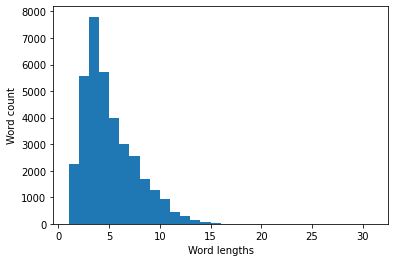

In [8]:
wordlengths = np.zeros(len(words))

for wordi in range(len(words)):
  wordlengths[wordi] = len(words[wordi])

plt.hist(wordlengths,bins = 30)
plt.xlabel('Word lengths')
plt.ylabel('Word count')
plt.show()

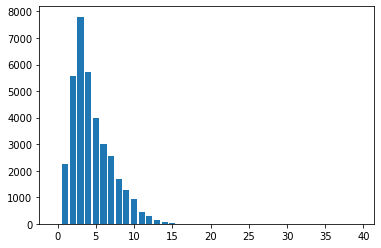

In [9]:
wordcounts = np.zeros(40)
for wrd in words:
  wordcounts[len(wrd)] +=1

plt.bar(range(len(wordcounts)),wordcounts)
plt.show()

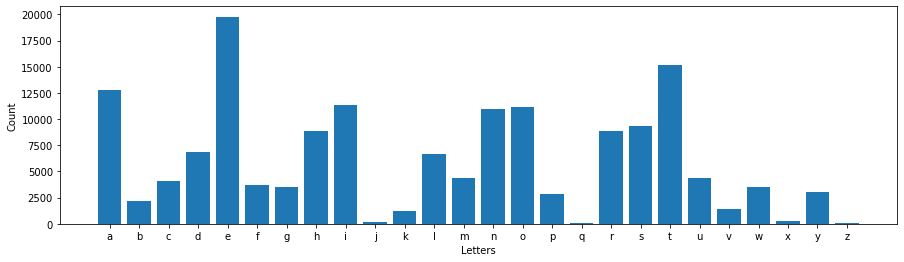

In [10]:
letters = string.ascii_lowercase
lettercounts = np.zeros(len(letters))
n = 0
for i in letters:
  lettercounts[n] = text.lower().count(i)
  n+=1


fig,ax = plt.subplots(1,figsize=(15,4))
ax.set_xticks(range(len(letters)))
ax.set_xticklabels(letters)
ax.set_xlabel('Letters')
ax.set_ylabel('Count')
plt.bar(range(len(letters)),lettercounts)
plt.show()

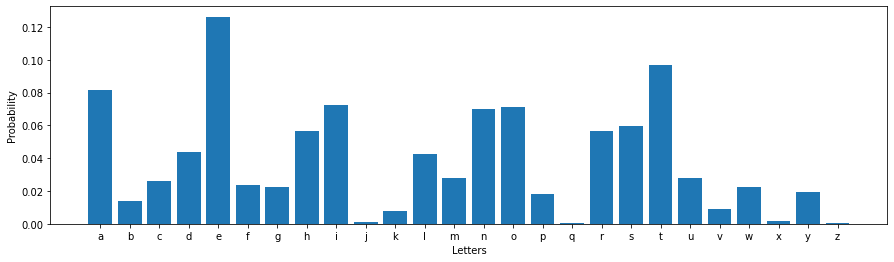

In [11]:
# Convert from count to probability

letterprob = lettercounts / sum(lettercounts)

fig,ax = plt.subplots(1,figsize=(15,4))
ax.set_xticks(range(len(letters)))
ax.set_xticklabels(letters)
ax.set_xlabel('Letters')
ax.set_ylabel('Probability')
plt.bar(range(len(letters)),letterprob)
plt.show()
fig;

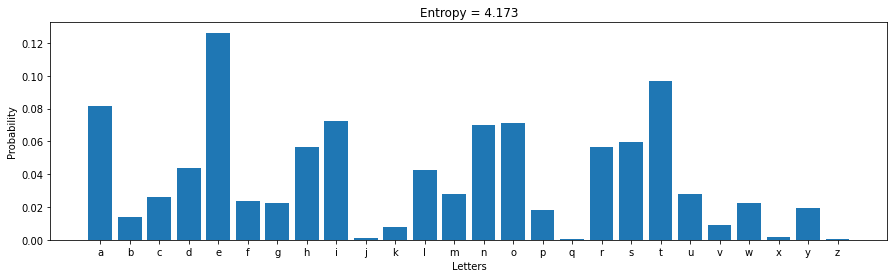

In [12]:
entropy = -sum(letterprob*np.log2(letterprob + np.finfo(float).eps))
entropy

ax.set_title('Entropy = %.3f'%entropy)
fig

In [15]:
# Conditional (sequence) property


numletters = len(letters)
probmat = np.zeros((numletters,numletters))


for i in range(len(text)-1):

  currlet = text[i]
  nextlet = text[i+1]
  if currlet in letters and nextlet in letters:
    probmat[letters.index(currlet),letters.index(nextlet)] += 1

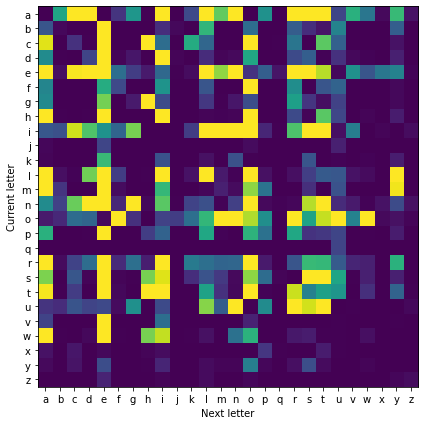

In [25]:
fig,ax = plt.subplots(1,figsize=(7,7))
ax.imshow(probmat,vmax = 500)
ax.set_ylabel('Current letter')
ax.set_xlabel('Next letter')
ax.set_xticks(range(numletters))
ax.set_yticks(range(numletters))
ax.set_xticklabels(letters)
ax.set_yticklabels(letters)
plt.show()

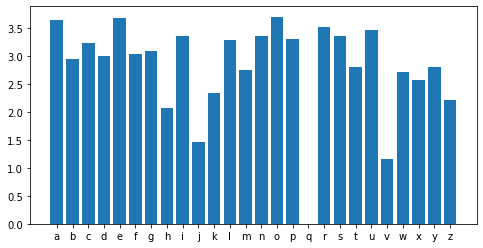

In [31]:
condentr = np.zeros(numletters)
for i in range(numletters):
  
  probs = probmat[i,:]
  probs =probs/sum(probs)
  condentr[i] = -sum(probs*np.log2(probs + np.finfo(float).eps))

fig, ax = plt.subplots(1, figsize=(8,4))
ax.bar(range(numletters),condentr)
ax.set_xticks(range(numletters))
ax.set_xticklabels(letters)
plt.show()

(-0.5, 399.5, 199.5, -0.5)

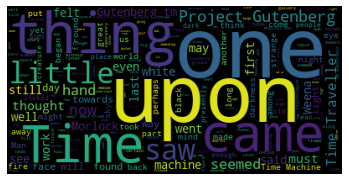

In [35]:
# wordcloud

from wordcloud import WordCloud
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis('off')